# Exercises 07

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit #non so se queste ultime due servono

All pictures are done in reduced units

## Exercise 07.2 - Monte Carlo NVT

In [4]:
def autocorrelation(x,size):
    autoc = np.zeros(size)
    l = x.size-size
    
    x1 = np.mean(x[:l])
    x1_2 = np.mean(x[:l]**2)
    sigma = x1_2 - x1**2
    
    for t in range(size):
        x2 = np.mean(x[t:l+t])
        x3 = np.mean( x[:l]*x[t:l+t] )
        
        autoc[t] = (x3 - x1*x2)/sigma
    
    return autoc

In [1]:
def errors(x, dim):
    discr = np.zeros(dim)
    for L in range (1,dim):
        ave  = np.mean(x[:L])
        av2  = np.mean(x[:L]**2)
        
        discr[L] = math.sqrt(abs(av2-ave*ave))
    return discr

### Solid phase

#### <span style="color:green"> Not equilibrated <span>

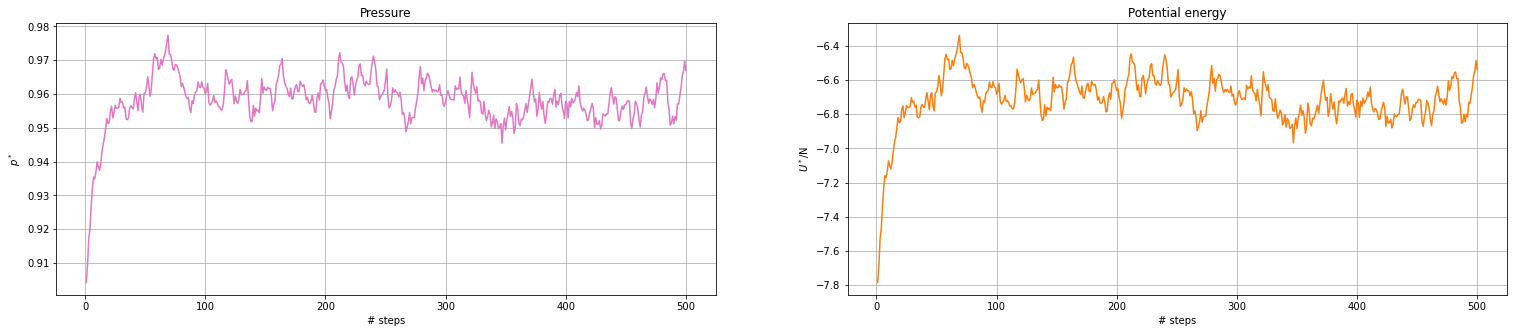

In [61]:
path = "Solido/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Solido/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

Since the temperature and the kinetik energy are already fixed in the code, we only need to check if the pressure and the potential energy are stable. This was done using 500 steps, even though even just 100 would have worked as well.

#### <span style="color:green"> Equilibrated <span>

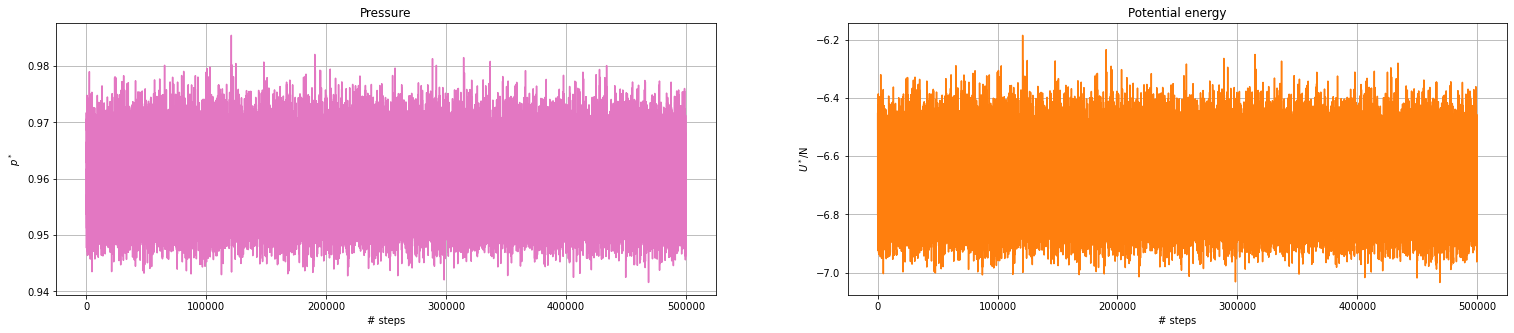

In [60]:
path = "Solido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Solido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

We can see that now pressure and potential energy are equilibrated; the fluctuation are simply statistical.

#### <span style="color:green"> Autocorrelation <span>

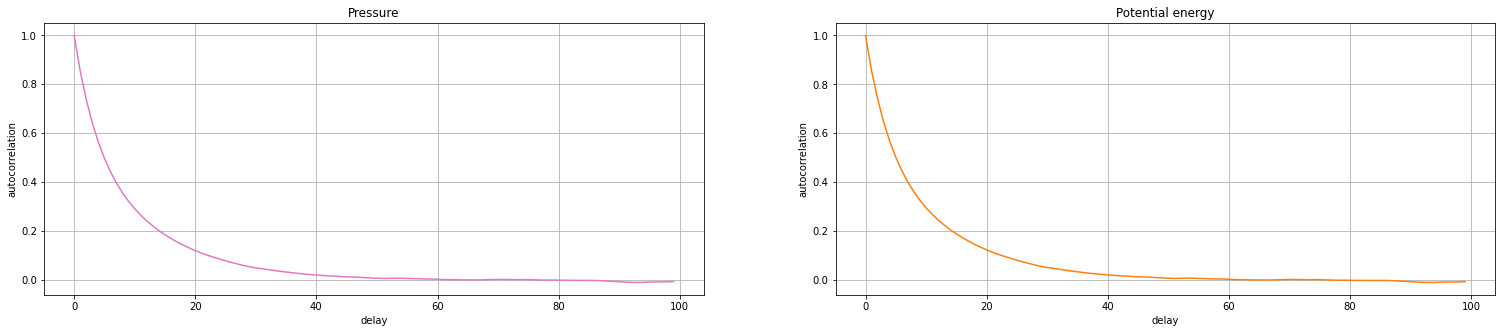

In [133]:
path = "Solido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Solido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_corr=autocorrelation(epot,100)
pres_corr=autocorrelation(pres,100)

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(epot_corr, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('delay')
ax2.set_ylabel('autocorrelation')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(pres_corr, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('delay')
ax1.set_ylabel('autocorrelation')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)

plt.show()

Using a block longer than 60 steps, the following block is uncorrelated to the one before it.

#### <span style="color:green"> Statistical uncertainties <span>

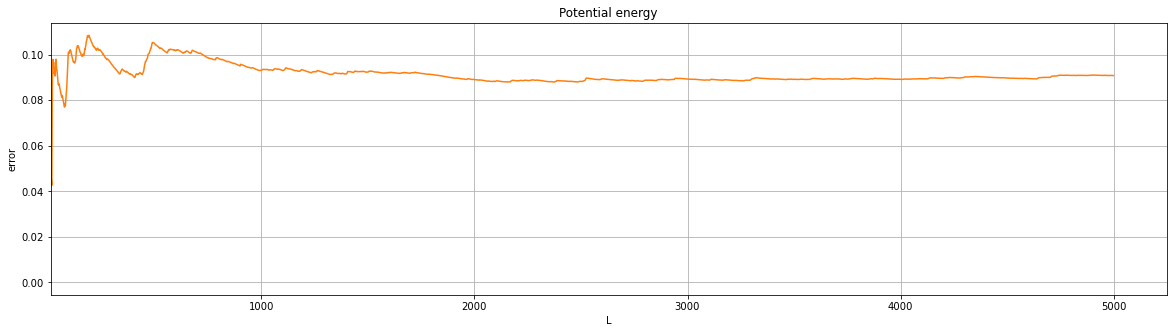

In [19]:
path = "Solido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Solido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_err=errors(epot,5000)

plt.figure(figsize=(20,5))
plt.plot(epot_err, label = 'potential energy', c = "tab:orange")
plt.xlabel('L')
plt.ylabel('error')
plt.xlim(10)
plt.grid("True")
plt.title("Potential energy", size = 12)

plt.show()

At first the big fluctuations are due to the autocorrelation. Then we can see that L=1000 could be an optimal value.

### Liquid phase

#### <span style="color:green"> Not equilibrated <span>

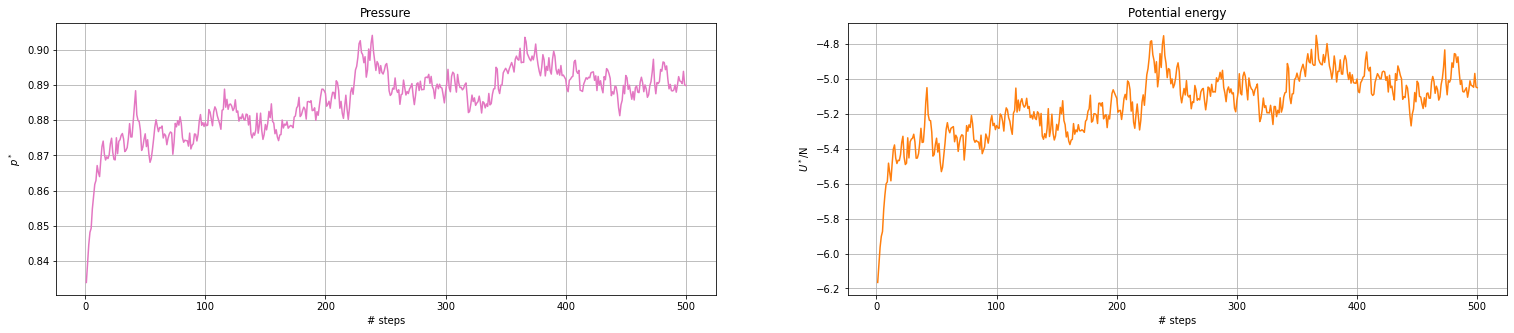

In [62]:
path = "Liquido/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Liquido/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

After 500 steps pressure and potential energy are equilibrated.

#### <span style="color:green"> Equilibrated <span>

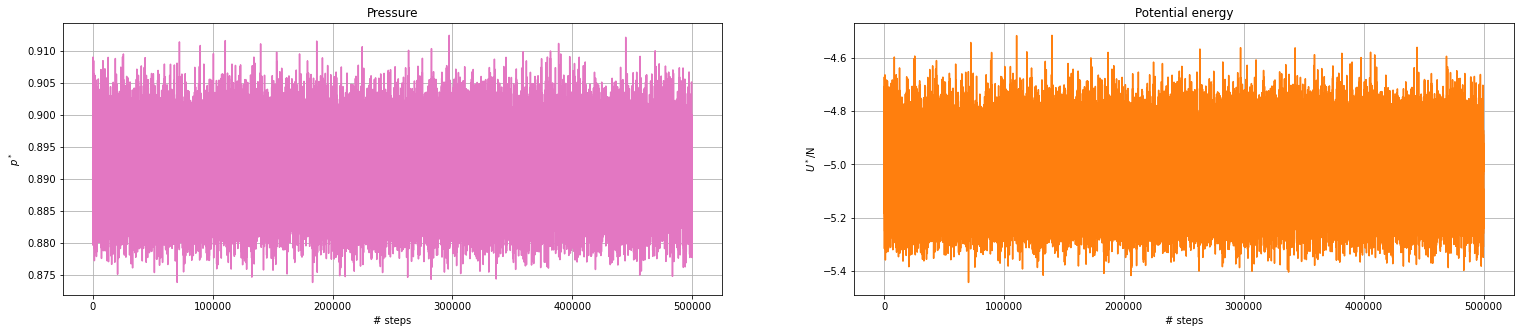

In [63]:
path = "Liquido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Liquido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

#### <span style="color:green"> Autocorrelation <span>

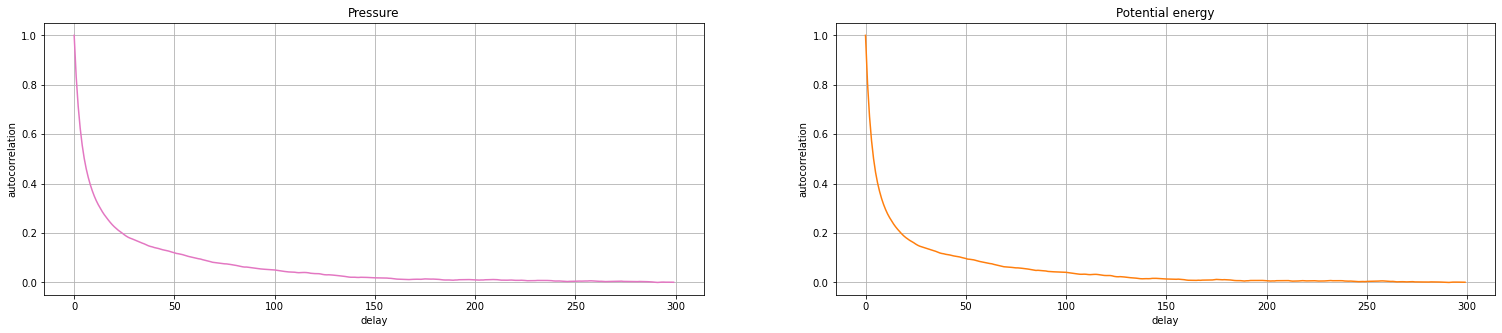

In [130]:
path = "Liquido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Liquido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_corr=autocorrelation(epot,300)
pres_corr=autocorrelation(pres,300)

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(epot_corr, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('delay')
ax2.set_ylabel('autocorrelation')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(pres_corr, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('delay')
ax1.set_ylabel('autocorrelation')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)

plt.show()

Using a block longer than 300 steps, the following block is uncorrelated to the one before it.

#### <span style="color:green"> Statistical uncertainties <span>

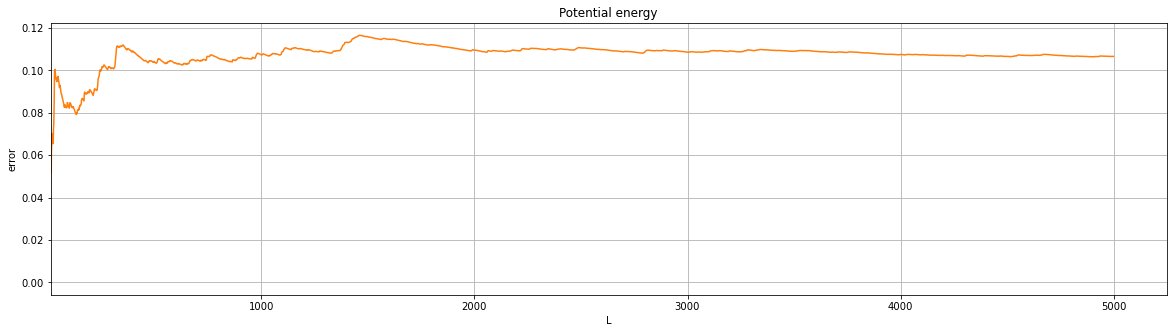

In [22]:
path = "Liquido/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Liquido/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_err=errors(epot,5000)

plt.figure(figsize=(20,5))
plt.plot(epot_err, label = 'potential energy', c = "tab:orange")
plt.xlabel('L')
plt.ylabel('error')
plt.xlim(10)
plt.grid("True")
plt.title("Potential energy", size = 12)

plt.show()

Then we can see that L=1500 could be an optimal value.

### Gas phase

#### <span style="color:green"> Not equilibrated <span>

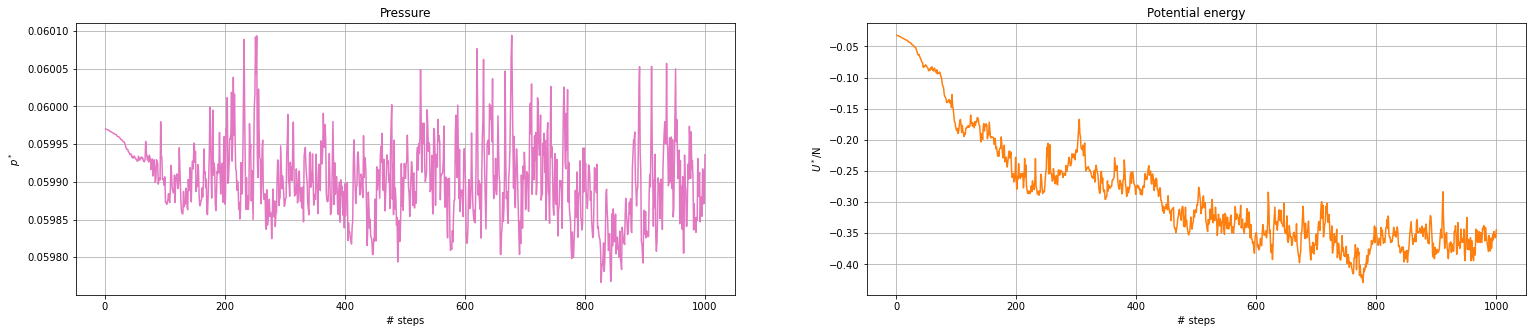

In [64]:
path = "Gas/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Gas/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

After 1000 steps pressure and potential energy are equilibrated.

#### <span style="color:green"> Equilibrated <span>

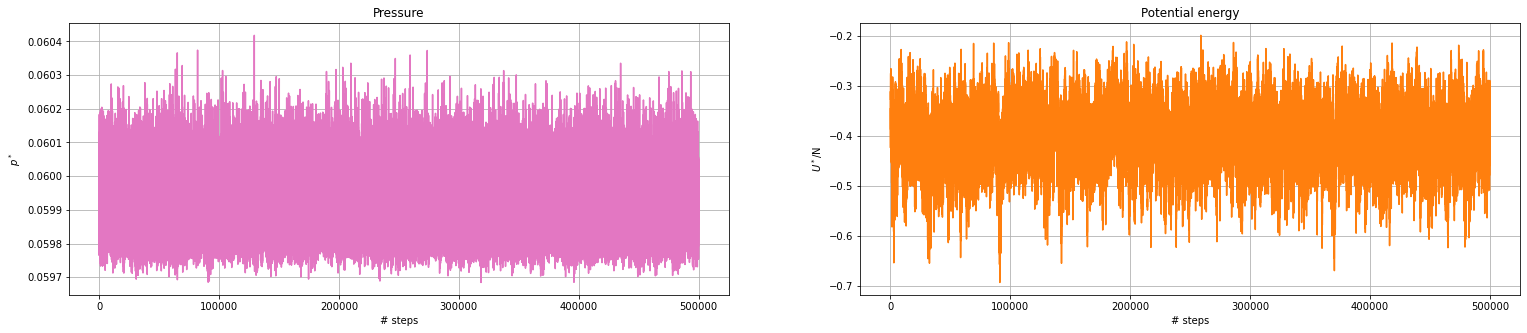

In [65]:
path = "Gas/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Gas/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(x_pres,pres, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$p^*$')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)


plt.show()

#### <span style="color:green"> Autocorrelation <span>

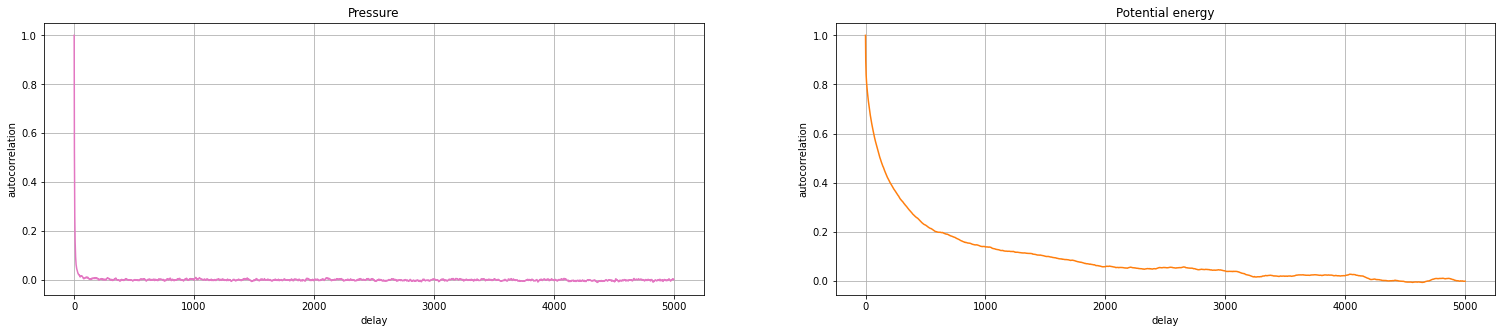

In [131]:
path = "Gas/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Gas/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_corr=autocorrelation(epot,5000)
pres_corr=autocorrelation(pres,5000)

fig1, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))


ax2.plot(epot_corr, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('delay')
ax2.set_ylabel('autocorrelation')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax1.plot(pres_corr, label = 'pressure', c = "tab:pink")
ax1.set_xlabel('delay')
ax1.set_ylabel('autocorrelation')
ax1.grid("True")
ax1.set_title("Pressure", size = 12)

plt.show()

Using a block longer than 5000 steps, the following block is uncorrelated to the one before it.

#### <span style="color:green"> Statistical uncertainties <span>

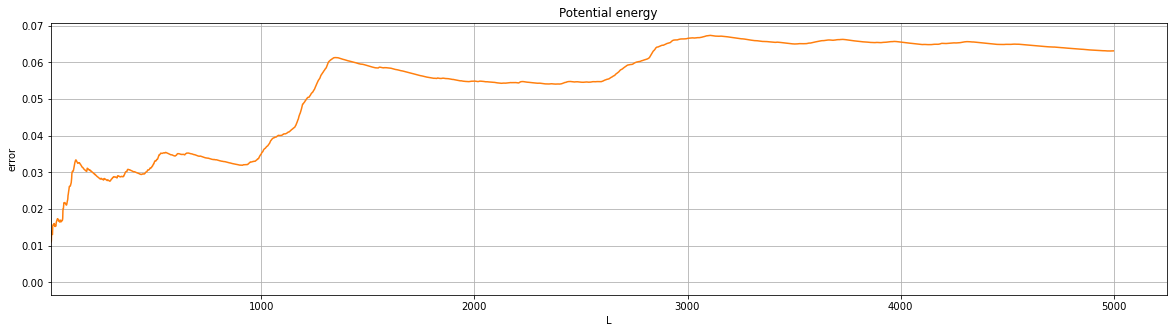

In [23]:
path = "Gas/equilibrato/output_epot.dat"
x_epot, epot = np.loadtxt(path, usecols=(0, 1), unpack='true')

path = "Gas/equilibrato/output_pres.dat"
x_pres, pres= np.loadtxt(path, usecols=(0, 1), unpack='true')

epot_err=errors(epot,5000)

plt.figure(figsize=(20,5))
plt.plot(epot_err, label = 'potential energy', c = "tab:orange")
plt.xlabel('L')
plt.ylabel('error')
plt.xlim(10)
plt.grid("True")
plt.title("Potential energy", size = 12)

plt.show()

Then we can see that L=3000 could be an optimal value.

## Exercise 07.4 - Monte Carlo Radial distribution

#### <span style="color:green"> Radial distribution <span>

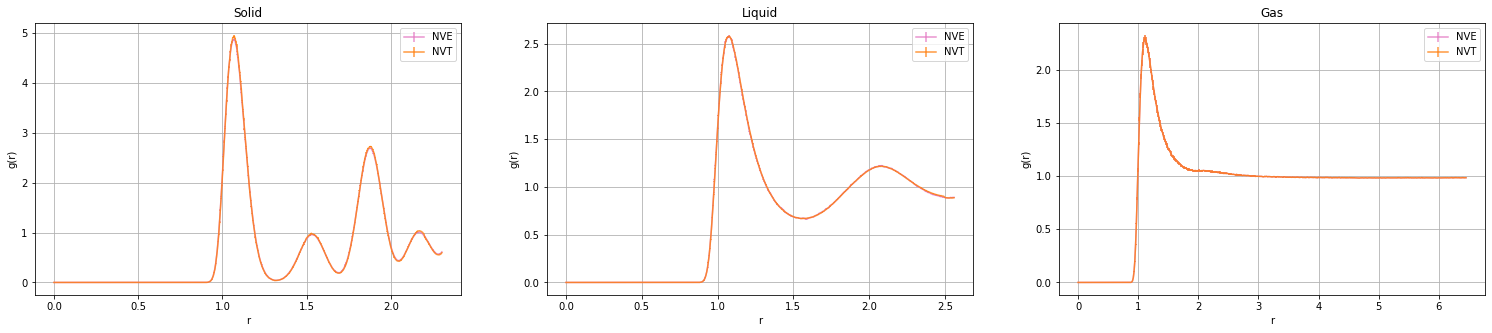

In [17]:
path = "Solido/output_gfin_0.dat"
x_0_s, g_0_s, err_g_0_s = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Solido/output_gfin_1.dat"
x_1_s, g_1_s, err_g_1_s = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Liquido/output_gfin_0.dat"
x_0_l, g_0_l, err_g_0_l = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Liquido/output_gfin_1.dat"
x_1_l, g_1_l, err_g_1_l = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Gas/output_gfin_1.dat"
x_0_g, g_0_g, err_g_0_g = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Gas/output_gfin_1.dat"
x_1_g, g_1_g, err_g_1_g = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')


fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 5))


ax1.errorbar(x_0_s, g_0_s, yerr=err_g_0_s, label = "NVE", alpha = 0.8, c="tab:pink")
ax1.errorbar(x_1_s, g_1_s, yerr=err_g_1_s, label = "NVT", alpha = 0.8, c="tab:orange")
ax1.set_xlabel('r')
ax1.set_ylabel('g(r)')
ax1.grid("True")
ax1.set_title("Solid")
ax1.legend()

ax2.errorbar(x_0_l, g_0_l, yerr=err_g_0_l, label = "NVE", alpha = 0.8, c="tab:pink")
ax2.errorbar(x_1_l, g_1_l, yerr=err_g_1_l, label = "NVT", alpha = 0.8, c="tab:orange")
ax2.set_xlabel('r')
ax2.set_ylabel('g(r)')
ax2.grid("True")
ax2.set_title("Liquid")
ax2.legend()

ax3.errorbar(x_0_g, g_0_g, yerr=err_g_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax3.errorbar(x_1_g, g_1_g, yerr=err_g_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax3.set_xlabel('r')
ax3.set_ylabel('g(r)')
ax3.grid("True")
ax3.set_title("Gas")
ax3.legend()


plt.show()

The radial distribution shows the probability of finding a particule at distance r from another particle.  

The solid regular and periodic structure together with the almost lack of defects, tells us that we expect to find discrete peaks at $1, \sqrt{2}, \sqrt{3}$ (i.e. the three nearest point of a cube: the side, the diagonal of the square and the diagonal of the cube). And there is almost zero probability of finding a molecule in between the peaks due to its regularity.

The liquid phase is far less organized. Where r<0 the two atoms should overlap and this indicates a g(r)~0. The first peak can be found at r=1 and then for higher r the molecules become indipendent and the g(r) become the bulk density distribution (g(r)=1)

A similar reasoning can be conducted for the gas phase, where the molecules become indipendent already at r=2.

### Solid phase

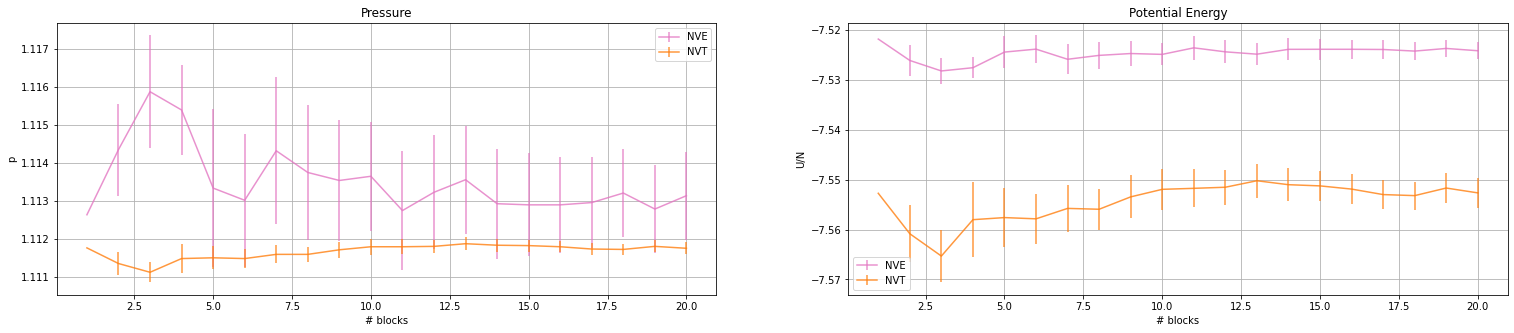

In [6]:
path = "Solido/output_pres_0.dat"
x_0_g, pres_0_g, err_pres_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_pres_1.dat"
x_1_g, pres_1_g, err_pres_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_epot_0.dat"
x_0_g, epot_0_g, err_epot_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_epot_1.dat"
x_1_g, epot_1_g, err_epot_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_0_g, pres_0_g, yerr=err_pres_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax1.errorbar(x_1_g,pres_1_g, yerr=err_pres_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('p')
ax1.grid("True")
ax1.set_title("Pressure")
ax1.legend()

ax2.errorbar(x_0_g, epot_0_g, yerr=err_epot_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax2.errorbar(x_1_g, epot_1_g, yerr=err_epot_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('U/N')
ax2.grid("True")
ax2.set_title("Potential Energy")
ax2.legend()


plt.show()

### Liquid phase

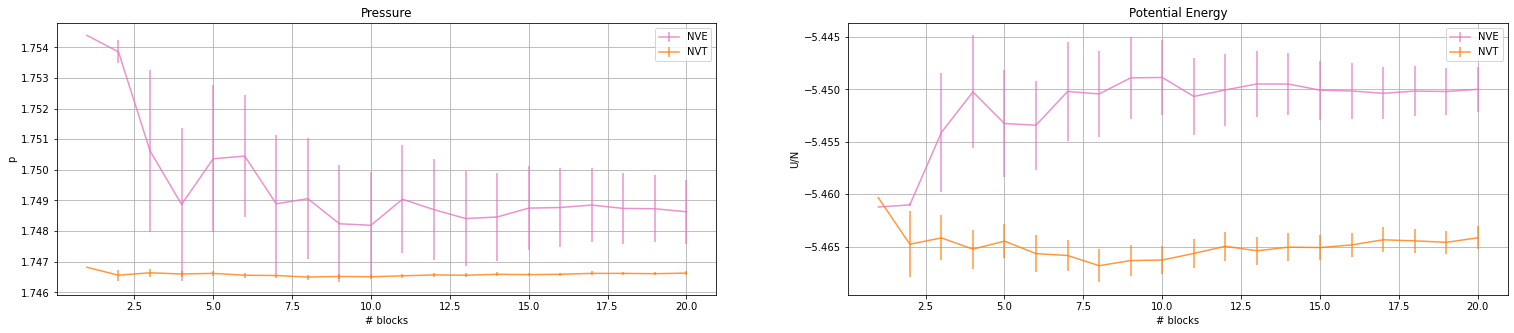

In [25]:
path = "Liquido/output_pres_0.dat"
x_0_g, pres_0_g, err_pres_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_pres_1.dat"
x_1_g, pres_1_g, err_pres_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_epot_0.dat"
x_0_g, epot_0_g, err_epot_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_epot_1.dat"
x_1_g, epot_1_g, err_epot_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_0_g, pres_0_g, yerr=err_pres_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax1.errorbar(x_1_g,pres_1_g, yerr=err_pres_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('p')
ax1.grid("True")
ax1.set_title("Pressure")
ax1.legend()

ax2.errorbar(x_0_g, epot_0_g, yerr=err_epot_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax2.errorbar(x_1_g, epot_1_g, yerr=err_epot_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('U/N')
ax2.grid("True")
ax2.set_title("Potential Energy")
ax2.legend()


plt.show()

### Gas phase

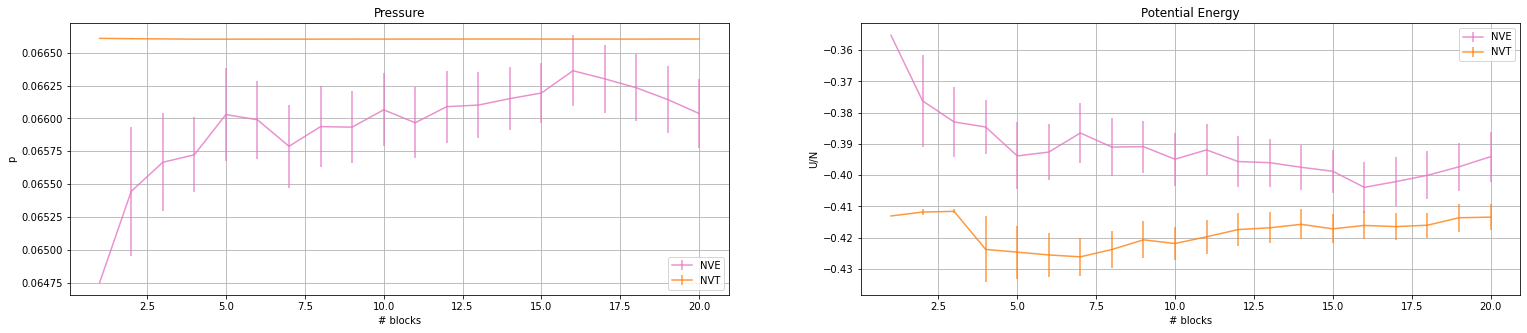

In [26]:
path = "Gas/output_pres_0.dat"
x_0_g, pres_0_g, err_pres_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_pres_1.dat"
x_1_g, pres_1_g, err_pres_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_epot_0.dat"
x_0_g, epot_0_g, err_epot_0_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_epot_1.dat"
x_1_g, epot_1_g, err_epot_1_g = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_0_g, pres_0_g, yerr=err_pres_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax1.errorbar(x_1_g,pres_1_g, yerr=err_pres_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('p')
ax1.grid("True")
ax1.set_title("Pressure")
ax1.legend()

ax2.errorbar(x_0_g, epot_0_g, yerr=err_epot_0_g, label = "NVE", alpha = 0.8, c="tab:pink")
ax2.errorbar(x_1_g, epot_1_g, yerr=err_epot_1_g, label = "NVT", alpha = 0.8, c="tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('U/N')
ax2.grid("True")
ax2.set_title("Potential Energy")
ax2.legend()


plt.show()

After the equilibration, we can see that in all the three phases and using both methods (NVE and NVT) both the pressure and the potential energy per molecule are almost constant. They are not that compatible due to the small error, but they get to a similar value in the end. Also we can see that the NVT simulation is far more precise that the NVE simulation.